# Actividad 3. Caso de aprendizaje no supervisado

indice

# Objetivos

- Ser capaz de manejar el entorno IPython Notebook para crear y cargar datos.
- Ser capaz de entrenar algoritmos de aprendizaje no supervisado con scikit.learn, y comparar sus resultados.
- Ser capaz de evaluar los resultados de un modelo obtenido por las características de los clusters obtenidos.
- Ser capaz de razonar sobre el funcionamiento de un algoritmo de minería de reglas de asociación.

## Criterios de evaluación:

Las Partes 1 y 2 son enunciados cerrados, con tareas concretas, similares a las prácticas que se han realizado en el trabajo con los materiales del Tema 3.

La tercera parte está pensada sólo para aquellos estudiantes que quieran profundizar más y explorar otros algoritmos de la biblioteca, por lo tanto es una actividad abierta.

El resultado de cada parte que hay que entregar es un Notebook de IPython, junto con los ficheros adicionales que fuesen necesarios (por ejemplo, ficheros con los datos). 

Se debe entregar un solo fichero ZIP con el nombre del estudiante que contenga todos los Notebooks y material asociado.

Tanto el código como la explicación y razonamiento sobre los resultados del estudiante debe quedar recogida en el Notebook. Se valorará la explicación, no solamente el uso de las bibliotecas en sí y el código.

## Parte 1. Aprendizaje no supervisado: algoritmos de clustering (60%)

En esta primera parte vamos a trabajar con algoritmos de clustering.

### 1. Generar datasets con make_blobs() para al menos 5 clusters. Dibujarlos y configurar make_blobs() para que los clusters tengan un cierto solapamiento.

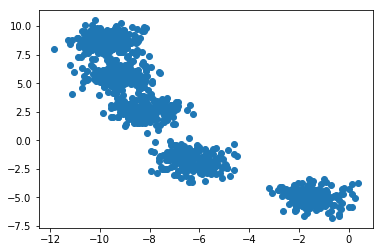

In [1]:
# Importando libreria make_blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.7, random_state=34)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], X[:,1]);

__Evaluar cada uno de los modelos con el Silhoutte score__

In [2]:
from sklearn import metrics
metrics.silhouette_score(X, y, metric='euclidean')

0.65630402968697965

### 2. Utilizar el algoritmo KMeans para crear modelos pidiendo que extraiga desde 2 hasta 10 clusters (en general, que se vaya de menos a más de los clusters realmente generados).

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# obtienendo los datos
dataset = load_iris()

modelos = [KMeans(n_clusters= nidx, random_state=37)for nidx in range(2, 11)]

nro_cluster = 2
for modelo in modelos:
    modelo.fit(dataset.data)
    print( "Modelo con {} Cluster :".format(nro_cluster) ,metrics.adjusted_rand_score(dataset.target, modelo.labels_))
    nro_cluster= nro_cluster+1

Modelo con 2 Cluster : 0.539921829421
Modelo con 3 Cluster : 0.730238272283
Modelo con 4 Cluster : 0.649817685382
Modelo con 5 Cluster : 0.607896465236
Modelo con 6 Cluster : 0.453706493374
Modelo con 7 Cluster : 0.480636906093
Modelo con 8 Cluster : 0.454757152362
Modelo con 9 Cluster : 0.404263052678
Modelo con 10 Cluster : 0.347640884742


__Evaluar cada uno de los modelos con el Silhoutte score__

Silhouette para Cluster 2: 0.680813620271


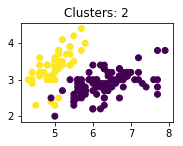

Silhouette para Cluster 3: 0.552591944521


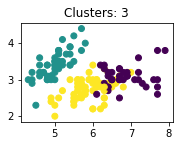

Silhouette para Cluster 4: 0.497825690075


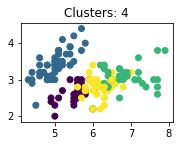

Silhouette para Cluster 5: 0.488517550854


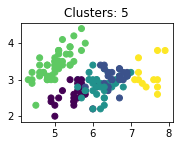

Silhouette para Cluster 6: 0.371218050256


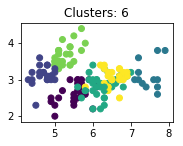

Silhouette para Cluster 7: 0.360059799443


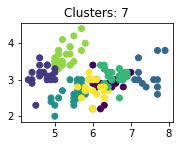

Silhouette para Cluster 8: 0.361420186293


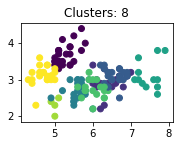

Silhouette para Cluster 9: 0.336076149492


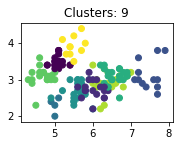

Silhouette para Cluster 10: 0.311123482321


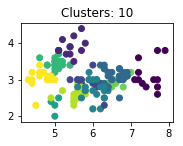

In [4]:

import numpy as np
import matplotlib.pyplot as plt



n_cluster = 2
sub_p = 220
for nmodelo in modelos:
    mlabels = nmodelo.labels_
    print("Silhouette para Cluster {}:".format(n_cluster), metrics.silhouette_score(dataset.data, mlabels, metric='euclidean'))    
    
    #plt.subplot(n_cluster)
    sub_p = sub_p + 1 
    plt.subplot(sub_p)
    
    
    nmodelo_p=nmodelo.fit_predict(dataset.data)    
    plt.scatter(dataset.data[:, 0], dataset.data[:, 1], c=nmodelo_p)
    plt.title("Clusters: {}".format(n_cluster))
    plt.show()
    n_cluster = n_cluster+1
    
    if (sub_p>223):
        sub_p = 220

Otro ejemplo que he revisado , lo he encontrado en la documentacion de scikitlearn

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.680157883241


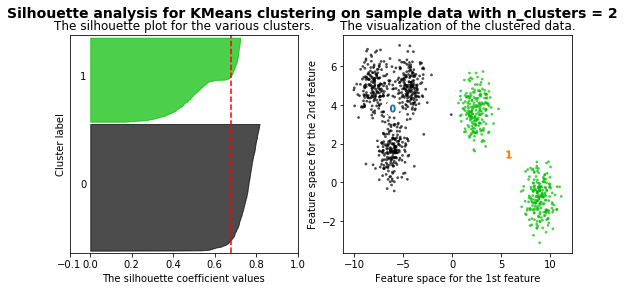

For n_clusters = 3 The average silhouette_score is : 0.710216552781


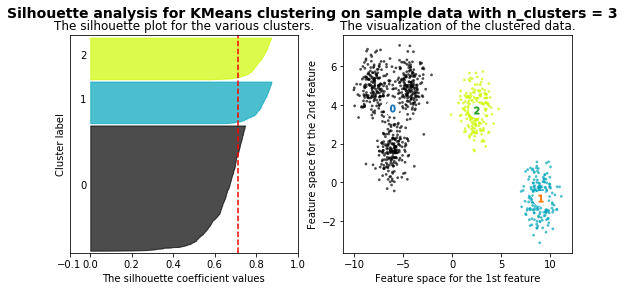

For n_clusters = 4 The average silhouette_score is : 0.590242868861


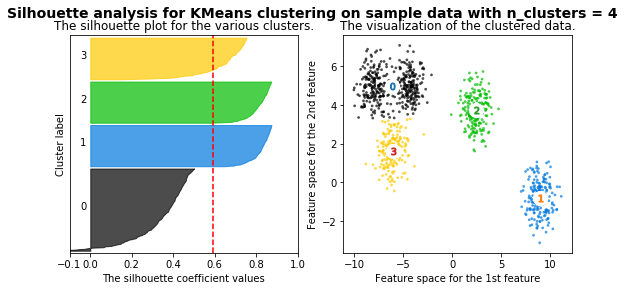

For n_clusters = 5 The average silhouette_score is : 0.682310861264


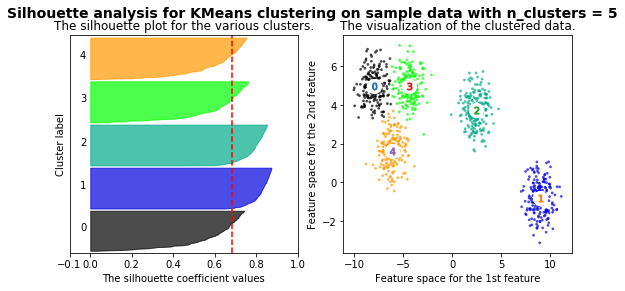

For n_clusters = 6 The average silhouette_score is : 0.611873294494


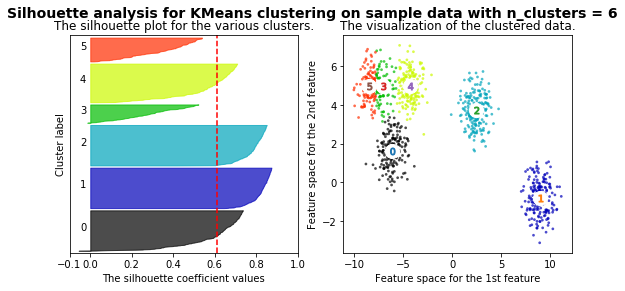

For n_clusters = 7 The average silhouette_score is : 0.520574380416


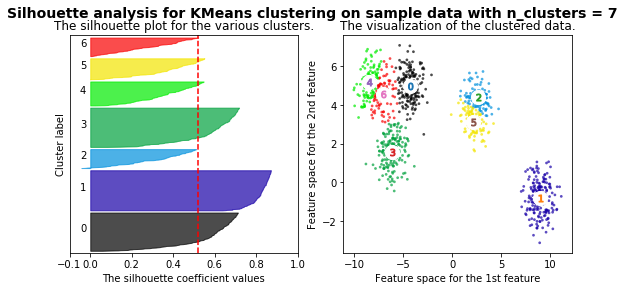

For n_clusters = 8 The average silhouette_score is : 0.42846642754


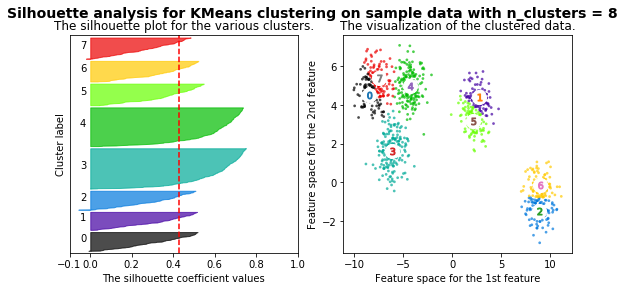

For n_clusters = 9 The average silhouette_score is : 0.366656961269


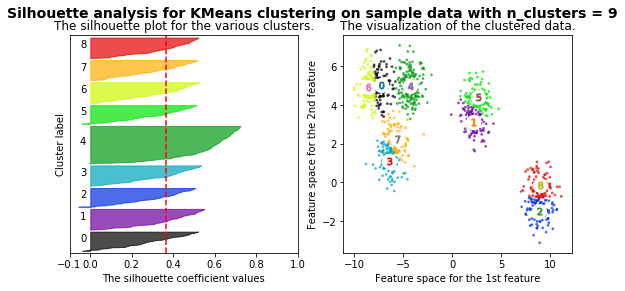

For n_clusters = 10 The average silhouette_score is : 0.318012442008


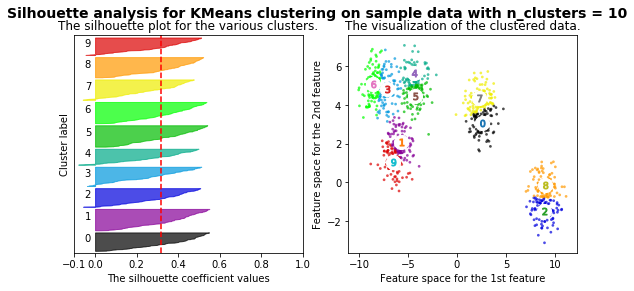

In [5]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=5,
                  cluster_std=0.8,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=37)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(9, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### Evaluar cada uno de los modelos con el Silhoutte score y comentar los resultados, razonando si el score nos ayudaría en un problema real a seleccionar el número de clusters a obtener.

__Caso1:__
Para el primer caso, se ecogieron 5 agrupaciones, con una sd de 0.7, 0el score resultante desde Silhoutte llega a ser de 0.68, va depender de lo que se quisiera clasificar, para decidir si realmente va ser util o no, el score es bajo.

__Caso2:__
El segundo caso, escogimos el dataset de Iris, este viene configurado con 3 targets, y si vemos como se dio el algoritmo, el mejor de los casos nos resulta cuando realizamos un kmeans con 5 clusters, esto se ajusta bien al dataset que se ha ingresado, por otro lado notamos que mientras mas vayamos creciendo en cluster esto empeora.


## Parte 2. Aprendizaje no supervisado: reglas de asociación (20%)


### Utilizando el Notebook de ejemplo de clase, crear datos de ejemplo de transacciones en una tienda de electrónica para las tareas (2) y (3).

In [6]:
dataset =  [
            ['Televisor','Cargador','Parlantes','USB'], 
            ['Afeitadora', 'USB','Cepillo Electrico','Cargador'], 
            ['Licuadora','Microhondas','Cafetera','Hervidor'], 
            ['Lavadora','Lavadora de Platos','Hervidor'],
            ['Cocina Electrica','Cafetera','Licuadora','Hervidor'],
            ['Movil','Carcasa','USB','Cargador'],
            ['Equipo de Sonido','USB','Cargador'], 
            ['Tablet','Carcasa', 'USB','Cargador'], 
            ['Olla Electrica','Batidora','Hervidor'],
            ['Laptop','Mouse','Carcasa','Cargador'],
            ['Movil','Parlantes','Carcasa','Cargador'],
            ['Router','Carcasa','Cargador','Mouse'],
            ['Audifonos','USB','Cargador','Mouse'],
            ['Repetidor de Wifi','USB'],
            ['Cafetera','Hervidor'],
            ['Movil','Carcasa','USB','Cargador'],
            ['Audifonos','USB','Carcasa'],
            ['Amplificador','Carcasa','Cargador'],
            ['Plancha','Tabla Planchar'],
            ['Lustradora','Carcasa'],
            ['USB','Cargador'],
            ['Bateria','Cepillo Electrico', 'USB','Cargador'],
            ['Plancha','Tabla Planchar', 'Hervidor'],
            ['Cuchillo Electrico','Cafetera','Hervidor','Cargador']
            ]

print(dataset)

[['Televisor', 'Cargador', 'Parlantes', 'USB'], ['Afeitadora', 'USB', 'Cepillo Electrico', 'Cargador'], ['Licuadora', 'Microhondas', 'Cafetera', 'Hervidor'], ['Lavadora', 'Lavadora de Platos', 'Hervidor'], ['Cocina Electrica', 'Cafetera', 'Licuadora', 'Hervidor'], ['Movil', 'Carcasa', 'USB', 'Cargador'], ['Equipo de Sonido', 'USB', 'Cargador'], ['Tablet', 'Carcasa', 'USB', 'Cargador'], ['Olla Electrica', 'Batidora', 'Hervidor'], ['Laptop', 'Mouse', 'Carcasa', 'Cargador'], ['Movil', 'Parlantes', 'Carcasa', 'Cargador'], ['Router', 'Carcasa', 'Cargador', 'Mouse'], ['Audifonos', 'USB', 'Cargador', 'Mouse'], ['Repetidor de Wifi', 'USB'], ['Cafetera', 'Hervidor'], ['Movil', 'Carcasa', 'USB', 'Cargador'], ['Audifonos', 'USB', 'Carcasa'], ['Amplificador', 'Carcasa', 'Cargador'], ['Plancha', 'Tabla Planchar'], ['Lustradora', 'Carcasa'], ['USB', 'Cargador'], ['Bateria', 'Cepillo Electrico', 'USB', 'Cargador'], ['Plancha', 'Tabla Planchar', 'Hervidor'], ['Cuchillo Electrico', 'Cafetera', 'Hervido

### Probar diferentes configuraciones de soporte y confianza para extraer reglas significativas, concretamente, alguna regla que tenga en el antecedente más de un ítem.

In [7]:
import apriori
F, soporte = apriori.apriori(dataset, min_support=0.22, verbose=True)

{Carcasa}:  sup = 0.375
{Hervidor}:  sup = 0.292
{USB}:  sup = 0.458
{Cargador}:  sup = 0.583
{Cargador, Carcasa}:  sup = 0.292
{Cargador, USB}:  sup = 0.375


In [8]:
H = apriori.generate_rules(F, soporte, min_confidence=0.9, verbose=True)
H2 = apriori.generate_rules(F, soporte, min_confidence=0.01, verbose=True)

{Carcasa} ---> {Cargador}:  conf = 0.778, sup = 0.292
{Cargador} ---> {Carcasa}:  conf = 0.5, sup = 0.292
{USB} ---> {Cargador}:  conf = 0.818, sup = 0.375
{Cargador} ---> {USB}:  conf = 0.643, sup = 0.375


### Explicar cómo ha calculado internamente el algoritmo el soporte y la confianza para algún caso concreto de regla, numéricamente.


In [9]:
# Generación de los 1-itemsets.
C1 = apriori.create_candidates(dataset, verbose=True)

{Afeitadora, Amplificador, Audifonos, Bateria, Batidora, Cafetera, Carcasa, Cargador, Cepillo Electrico, Cocina Electrica, Cuchillo Electrico, Equipo de Sonido, Hervidor, Laptop, Lavadora, Lavadora de Platos, Licuadora, Lustradora, Microhondas, Mouse, Movil, Olla Electrica, Parlantes, Plancha, Repetidor de Wifi, Router, Tabla Planchar, Tablet, Televisor, USB}


In [10]:
ftemp, stemp = apriori.support_prune(dataset, C1, 0.4)
print("1-itemsets frecuentes:", ftemp)
print("-----")
print("Soporte de los 1-itemsets:", stemp)

1-itemsets frecuentes: [frozenset({'USB'}), frozenset({'Cargador'})]
-----
Soporte de los 1-itemsets: {frozenset({'Cargador'}): 0.5833333333333334, frozenset({'Parlantes'}): 0.08333333333333333, frozenset({'Televisor'}): 0.041666666666666664, frozenset({'USB'}): 0.4583333333333333, frozenset({'Afeitadora'}): 0.041666666666666664, frozenset({'Cepillo Electrico'}): 0.08333333333333333, frozenset({'Cafetera'}): 0.16666666666666666, frozenset({'Hervidor'}): 0.2916666666666667, frozenset({'Licuadora'}): 0.08333333333333333, frozenset({'Microhondas'}): 0.041666666666666664, frozenset({'Lavadora'}): 0.041666666666666664, frozenset({'Lavadora de Platos'}): 0.041666666666666664, frozenset({'Cocina Electrica'}): 0.041666666666666664, frozenset({'Carcasa'}): 0.375, frozenset({'Movil'}): 0.125, frozenset({'Equipo de Sonido'}): 0.041666666666666664, frozenset({'Tablet'}): 0.041666666666666664, frozenset({'Batidora'}): 0.041666666666666664, frozenset({'Olla Electrica'}): 0.041666666666666664, frozen

Lo que esta buscando el algoritmo internamente, es la repeticiones que existe del producto en las distintas observaciones.

Toma en cuenta tambien la dirección de la relación.

## Parte 3. Utilizando otros algoritmos (20%)

Esta tercera parte de la actividad queda abierta para aquellos que queráis profundizar más en otros algoritmos. De lo que se trata es de buscar un dataset en la Web y aplicar al menos dos algoritmos de clustering diferentes, comparando sus resultados. Particularmente, en la documentación de Scikit-learn hay una tabla comparativa de diferentes algoritmos:

http://scikit-learn.org/stable/modules/clustering.html

Que incluye una columna “use case”. Se pretende que intentéis ilustrar el funcionamiento de alguno de los algoritmos para un caso concreto en comparación con otro. Por ejemplo, hay algoritmos que funciona mejor para tamaños de cluster desbalanceados que otros. Ese podría ser un caso de comparación, generando datos ad hoc para probar que funciona mejor que otro para ese caso.

__Spectral clustering__

Este ejemplo utiliza la agrupación Spectral en un gráfico creado a partir de la diferencia voxel-a-vóxel en una imagen para dividir esta imagen en múltiples regiones parcialmente homogéneas.

Este procedimiento (Spectral clustering en una imagen) es una solución aproximada eficiente para encontrar cortes de gráfico normalizados.

Hay dos opciones para asignar etiquetas (Kmeans y Discrete):

- Kmeans: Con la Spectral clustering 'kmeans' agrupará muestras en el espacio de intersecciones utilizando un algoritmo de kmeans.
- Discrete: Con la Spectral clustering 'Discrete' buscará iterativamente el espacio de partición más cercano al espacio que se parezca.

Automatically created module for IPython interactive environment
Mapache:


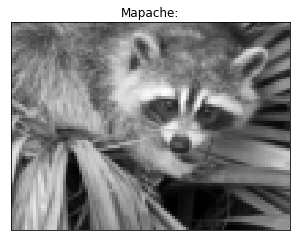

In [20]:
print(__doc__)

# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>, Brian Cheung
# License: BSD 3 clause

import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering


# load the raccoon face as a numpy array
try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(face)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 40

plt.figure(figsize=(5, 5))
plt.imshow(face, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
title = 'Mapache:'
print(title)
plt.title(title);

Visualize the resulting regions

C:\Users\chvasquez\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


Spectral clustering: kmeans, 4.15s
Spectral clustering: discretize, 2.94s


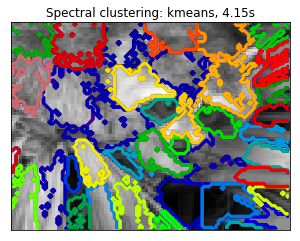

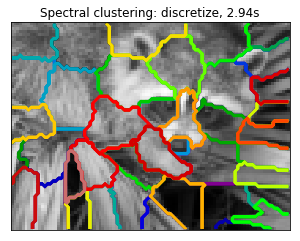

In [21]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

In [1]:
from PIL import Image
guacamayo = Image.open("guacamayo-41.jpg")
guacamayo_19 = Image.open("guacamayo_19.jpg")

#pinguino = Image.open("penguin-baby-baby-penguins.jpg")
#pinguino = Image.open("166041.png")

guacamayo_19:


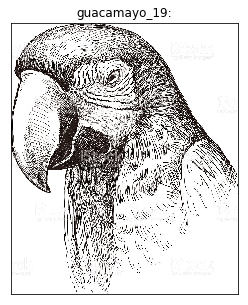

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.imshow(guacamayo_19)
plt.xticks(())
plt.yticks(())
title = 'guacamayo_19:'
print(title)
plt.title(title);plt.show()

In [6]:

import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering


# load the raccoon face as a numpy array
try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(guacamayo_19)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 7

In [ ]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

In [5]:
len(face)

76